In [1]:
%pip install matplotlib
%pip install seaborn
%pip install scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

import seaborn as sns

import scipy
import pylab

Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv("../data/merged-control-data.csv")

In [4]:
df.head()

contig         run         gene diagnosis  read_count  length  \
0           NaN   ERR011265  NP_417778.1    nonIBD    11684574     0.0   
1   k119_3900_3  SRR2145375  NP_417635.1    nonIBD    13713609   930.0   
2           NaN  SRR6468714  NP_417762.1        UC    10753164     0.0   
3           NaN   ERR011173  YP_026260.1    nonIBD    12373439     0.0   
4  k119_67485_2  SRR6468634  NP_417780.1        UC    16121658   312.0   

   mapped  unmapped  net_mapped  length_right  average_depth  
0     0.0       0.0         0.0           0.0           0.00  
1    74.0      18.0        56.0         930.0           7.64  
2     0.0       0.0         0.0           0.0           0.00  
3     0.0       0.0         0.0           0.0           0.00  
4    34.0      10.0        24.0         312.0           8.99

In [73]:
df_simple = df.copy()
df_simple['diagnosis'] = df_simple['diagnosis'].str.lower().replace({'cd': 'IBD', 'uc': 'IBD', 'nonibd': 'Control'})
df_simple['norm_depth'] = df_simple['average_depth']/df_simple['read_count'] * 1000000
df_simple.loc[df_simple['length'] > 0, 'norm_depth'] = (
    (df_simple.loc[df_simple['length'] > 0, 'norm_depth'] / df_simple.loc[df_simple['length'] > 0, 'length']) * 1000
)


df_filter = df[df['contig'].notna()]
df_simple_filter = df_simple[df_simple['contig'].notna()]

In [74]:
print('There are a minimum of 37 rows per sample')
df_simple.sort_values(['run', "gene"]).head(n=20)

There are a minimum of 37 rows per sample


contig        run         gene diagnosis  read_count  length  mapped  \
28200    NaN  ERR011087  NP_414711.1   Control    11640976     0.0     0.0   
21655    NaN  ERR011087  NP_414725.1   Control    11640976     0.0     0.0   
36114    NaN  ERR011087  NP_415431.1   Control    11640976     0.0     0.0   
40997    NaN  ERR011087  NP_416228.1   Control    11640976     0.0     0.0   
987      NaN  ERR011087  NP_416229.1   Control    11640976     0.0     0.0   
7433     NaN  ERR011087  NP_416690.1   Control    11640976     0.0     0.0   
30271    NaN  ERR011087  NP_417634.1   Control    11640976     0.0     0.0   
12168    NaN  ERR011087  NP_417635.1   Control    11640976     0.0     0.0   
1000     NaN  ERR011087  NP_417637.1   Control    11640976     0.0     0.0   
11660    NaN  ERR011087  NP_417697.1   Control    11640976     0.0     0.0   
41880    NaN  ERR011087  NP_417698.1   Control    11640976     0.0     0.0   
3296     NaN  ERR011087  NP_417756.1   Control    11640976     0.0     0.0   
43533    NaN  ERR011087  NP_417757.1   Control    11640976     0.0     0.0   
24700    NaN  ERR011087  NP_417760.1   Control    11640976     0.0     0.0   
35565    NaN  ERR011087  NP_417762.1   Control    11640976     0.0     0.0   
6556     NaN  ERR011087  NP_417763.1   Control    11640976     0.0     0.0   
1588     NaN  ERR011087  NP_417764.1   Control    11640976     0.0     0.0   
39010    NaN  ERR011087  NP_417765.1   Control    11640976     0.0     0.0   
28081    NaN  ERR011087  NP_417767.1   Control    11640976     0.0     0.0   
3334     NaN  ERR011087  NP_417768.1   Control    11640976     0.0     0.0   

       unmapped  net_mapped  length_right  average_depth  norm_depth  
28200       0.0         0.0           0.0            0.0         0.0  
21655       0.0         0.0           0.0            0.0         0.0  
36114       0.0         0.0           0.0            0.0         0.0  
40997       0.0         0.0           0.0            0.0         0.0  
987         0.0         0.0           0.0            0.0         0.0  
7433        0.0         0.0           0.0            0.0         0.0  
30271       0.0         0.0           0.0            0.0         0.0  
12168       0.0         0.0           0.0            0.0         0.0  
1000        0.0         0.0           0.0            0.0         0.0  
11660       0.0         0.0           0.0            0.0         0.0  
41880       0.0         0.0           0.0            0.0         0.0  
3296        0.0         0.0           0.0            0.0         0.0  
43533       0.0         0.0           0.0            0.0         0.0  
24700       0.0         0.0           0.0            0.0         0.0  
35565       0.0         0.0           0.0            0.0         0.0  
6556        0.0         0.0           0.0            0.0         0.0  
1588        0.0         0.0           0.0            0.0         0.0  
39010       0.0         0.0           0.0            0.0         0.0  
28081       0.0         0.0           0.0            0.0         0.0  
3334        0.0         0.0           0.0            0.0         0.0

In [75]:
print("But a sample may contain any number of contigs for a gene.\nI.e. a sample has a minimum of 37 rows but no maximum.")
df_simple.sort_values(['run', "gene"]).tail(n=20)

But a sample may contain any number of contigs for a gene.
I.e. a sample has a minimum of 37 rows but no maximum.


contig         run         gene diagnosis  read_count  length  \
4770              NaN  SRR6468718  NP_417765.1       IBD    10773619     0.0   
15205  k119_71785_106  SRR6468718  NP_417767.1       IBD    10773619   558.0   
40301             NaN  SRR6468718  NP_417768.1       IBD    10773619     0.0   
297               NaN  SRR6468718  NP_417769.1       IBD    10773619     0.0   
35624             NaN  SRR6468718  NP_417770.1       IBD    10773619     0.0   
6462              NaN  SRR6468718  NP_417771.1       IBD    10773619     0.0   
24596    k119_26880_3  SRR6468718  NP_417772.1       IBD    10773619   432.0   
17720             NaN  SRR6468718  NP_417773.1       IBD    10773619     0.0   
12788             NaN  SRR6468718  NP_417774.1       IBD    10773619     0.0   
28147             NaN  SRR6468718  NP_417775.1       IBD    10773619     0.0   
1663    k119_56464_11  SRR6468718  NP_417776.1       IBD    10773619   831.0   
13819             NaN  SRR6468718  NP_417778.1       IBD    10773619     0.0   
31980             NaN  SRR6468718  NP_417779.1       IBD    10773619     0.0   
16777             NaN  SRR6468718  NP_417780.1       IBD    10773619     0.0   
18887             NaN  SRR6468718  NP_417800.1       IBD    10773619     0.0   
22984    k119_31687_1  SRR6468718  NP_417801.1       IBD    10773619   378.0   
21745     k119_3662_2  SRR6468718  NP_418410.1       IBD    10773619   426.0   
25876             NaN  SRR6468718  NP_418411.1       IBD    10773619     0.0   
10750             NaN  SRR6468718  NP_418412.1       IBD    10773619     0.0   
6490              NaN  SRR6468718  YP_026260.1       IBD    10773619     0.0   

       mapped  unmapped  net_mapped  length_right  average_depth  norm_depth  
4770      0.0       0.0         0.0           0.0           0.00    0.000000  
15205   557.0     117.0       440.0         558.0          87.56   14.564982  
40301     0.0       0.0         0.0           0.0           0.00    0.000000  
297       0.0       0.0         0.0           0.0           0.00    0.000000  
35624     0.0       0.0         0.0           0.0           0.00    0.000000  
6462      0.0       0.0         0.0           0.0           0.00    0.000000  
24596    32.0       6.0        26.0         432.0           6.15    1.321386  
17720     0.0       0.0         0.0           0.0           0.00    0.000000  
12788     0.0       0.0         0.0           0.0           0.00    0.000000  
28147     0.0       0.0         0.0           0.0           0.00    0.000000  
1663    120.0      22.0        98.0         831.0          13.10    1.463217  
13819     0.0       0.0         0.0           0.0           0.00    0.000000  
31980     0.0       0.0         0.0           0.0           0.00    0.000000  
16777     0.0       0.0         0.0           0.0           0.00    0.000000  
18887     0.0       0.0         0.0           0.0           0.00    0.000000  
22984    45.0       3.0        42.0         378.0          10.35    2.541481  
21745    69.0       7.0        62.0         426.0          13.16    2.867376  
25876     0.0       0.0         0.0           0.0           0.00    0.000000  
10750     0.0       0.0         0.0           0.0           0.00    0.000000  
6490      0.0       0.0         0.0           0.0           0.00    0.000000

In [8]:
print("The average read count per diagnosis")
df_simple.groupby('diagnosis')['read_count'].mean()

The average read count per diagnosis


diagnosis
Control    1.276716e+07
IBD        1.204352e+07
Name: read_count, dtype: float64

In [9]:
print('Number of samples for each diagnosis')
df_simple.groupby(['diagnosis'])['run'].nunique()

Number of samples for each diagnosis


diagnosis
Control    372
IBD        688
Name: run, dtype: int64

In [10]:
df_simple.groupby(['diagnosis'])['gene'].nunique()

diagnosis
Control    37
IBD        37
Name: gene, dtype: int64

In [11]:
df_simple.groupby(['diagnosis', 'gene'])['run'].nunique()

diagnosis  gene       
Control    NP_414711.1    372
           NP_414725.1    372
           NP_415431.1    372
           NP_416228.1    372
           NP_416229.1    372
                         ... 
IBD        NP_417801.1    688
           NP_418410.1    688
           NP_418411.1    688
           NP_418412.1    688
           YP_026260.1    688
Name: run, Length: 74, dtype: int64

In [12]:
df_simple.groupby(['diagnosis', 'gene'])['run'].value_counts()

diagnosis  gene         run       
Control    NP_414711.1  SRR6468617    4
                        SRR6468689    4
                        SRR2145361    3
                        SRR6468523    3
                        SRR6468613    3
                                     ..
IBD        YP_026260.1  SRR6468714    1
                        SRR6468715    1
                        SRR6468716    1
                        SRR6468717    1
                        SRR6468718    1
Name: count, Length: 39220, dtype: int64

In [13]:
# Step 1–2: Get number of unique runs per (diagnosis, gene) group
run_counts = df_simple.groupby(['diagnosis', 'gene'])['run'].value_counts().sort_index()

# Step 3: Get value counts (i.e., how often each unique run count appears)
run_count_frequencies = run_counts.value_counts().sort_index()

# Step 4: Plot
#

In [14]:
print('Number of contigs for each diagnosis')
df_simple.groupby(['diagnosis', 'gene'])['gene'].value_counts()

Number of contigs for each diagnosis


diagnosis  gene       
Control    NP_414711.1    397
           NP_414725.1    406
           NP_415431.1    412
           NP_416228.1    410
           NP_416229.1    406
                         ... 
IBD        NP_417801.1    806
           NP_418410.1    799
           NP_418411.1    783
           NP_418412.1    788
           YP_026260.1    819
Name: count, Length: 74, dtype: int64

In [15]:
df_simple['is_dup'] = df_simple.groupby('diagnosis')['run'].transform(lambda x: x.duplicated(keep=False))

print('Number of samples that are duplicated')
df_simple[df_simple['is_dup']].groupby('diagnosis').size()

Number of samples that are duplicated


diagnosis
Control    14758
IBD        29557
dtype: int64

In [16]:
gene_diagnosis = pd.crosstab(df['gene'], df['diagnosis'])
gene_diagnosis
#pd.crosstab(df_simple['gene'], df_simple['diagnosis'])

diagnosis     CD   UC  nonIBD
gene                         
NP_414711.1  680  151     397
NP_414725.1  656  156     406
NP_415431.1  657  150     412
NP_416228.1  691  165     410
NP_416229.1  665  171     406
NP_416690.1  644  144     393
NP_417634.1  635  144     382
NP_417635.1  654  158     410
NP_417637.1  651  159     417
NP_417697.1  657  160     400
NP_417698.1  645  142     392
NP_417756.1  642  139     393
NP_417757.1  647  143     398
NP_417760.1  645  146     390
NP_417762.1  655  140     398
NP_417763.1  636  147     399
NP_417764.1  654  148     406
NP_417765.1  643  143     397
NP_417767.1  644  147     406
NP_417768.1  639  142     401
NP_417769.1  643  142     399
NP_417770.1  673  144     396
NP_417771.1  635  142     412
NP_417772.1  634  151     397
NP_417773.1  651  148     387
NP_417774.1  669  140     393
NP_417775.1  645  147     399
NP_417776.1  640  157     421
NP_417778.1  650  144     384
NP_417779.1  643  145     395
NP_417780.1  645  140     397
NP_417800.1  650  149     393
NP_417801.1  656  150     392
NP_418410.1  658  141     393
NP_418411.1  641  142     385
NP_418412.1  648  140     385
YP_026260.1  668  151     417

In [17]:
gene_diagnosis_filter = pd.crosstab(df_filter['gene'], df_filter['diagnosis'])
gene_diagnosis_filter

diagnosis     CD  UC  nonIBD
gene                        
NP_414711.1  304  72     124
NP_414725.1  264  88     148
NP_415431.1  262  68     170
NP_416228.1  274  85     141
NP_416229.1  271  91     138
NP_416690.1  294  65     141
NP_417634.1  275  81     144
NP_417635.1  278  78     144
NP_417637.1  274  76     150
NP_417697.1  284  86     130
NP_417698.1  295  75     130
NP_417756.1  290  69     141
NP_417757.1  281  68     151
NP_417760.1  301  75     124
NP_417762.1  319  58     123
NP_417763.1  255  82     163
NP_417764.1  275  76     149
NP_417765.1  285  68     147
NP_417767.1  272  74     154
NP_417768.1  302  57     141
NP_417769.1  300  63     137
NP_417770.1  300  65     135
NP_417771.1  255  72     173
NP_417772.1  276  83     141
NP_417773.1  310  66     124
NP_417774.1  326  59     115
NP_417775.1  286  74     140
NP_417776.1  263  84     153
NP_417778.1  311  62     127
NP_417779.1  281  71     148
NP_417780.1  275  65     160
NP_417800.1  300  75     125
NP_417801.1  286  79     135
NP_418410.1  289  65     146
NP_418411.1  308  68     124
NP_418412.1  309  64     127
YP_026260.1  281  74     145

In [18]:
gene_diagnosis_simple = pd.crosstab(df_simple['gene'], df_simple['diagnosis'])
gene_diagnosis_simple

diagnosis    Control  IBD
gene                     
NP_414711.1      397  831
NP_414725.1      406  812
NP_415431.1      412  807
NP_416228.1      410  856
NP_416229.1      406  836
NP_416690.1      393  788
NP_417634.1      382  779
NP_417635.1      410  812
NP_417637.1      417  810
NP_417697.1      400  817
NP_417698.1      392  787
NP_417756.1      393  781
NP_417757.1      398  790
NP_417760.1      390  791
NP_417762.1      398  795
NP_417763.1      399  783
NP_417764.1      406  802
NP_417765.1      397  786
NP_417767.1      406  791
NP_417768.1      401  781
NP_417769.1      399  785
NP_417770.1      396  817
NP_417771.1      412  777
NP_417772.1      397  785
NP_417773.1      387  799
NP_417774.1      393  809
NP_417775.1      399  792
NP_417776.1      421  797
NP_417778.1      384  794
NP_417779.1      395  788
NP_417780.1      397  785
NP_417800.1      393  799
NP_417801.1      392  806
NP_418410.1      393  799
NP_418411.1      385  783
NP_418412.1      385  788
YP_026260.1      417  819

In [19]:
gene_diagnosis_simple_filter = pd.crosstab(df_simple_filter['gene'], df_simple_filter['diagnosis'])
gene_diagnosis_simple_filter

diagnosis    Control  IBD
gene                     
NP_414711.1      124  376
NP_414725.1      148  352
NP_415431.1      170  330
NP_416228.1      141  359
NP_416229.1      138  362
NP_416690.1      141  359
NP_417634.1      144  356
NP_417635.1      144  356
NP_417637.1      150  350
NP_417697.1      130  370
NP_417698.1      130  370
NP_417756.1      141  359
NP_417757.1      151  349
NP_417760.1      124  376
NP_417762.1      123  377
NP_417763.1      163  337
NP_417764.1      149  351
NP_417765.1      147  353
NP_417767.1      154  346
NP_417768.1      141  359
NP_417769.1      137  363
NP_417770.1      135  365
NP_417771.1      173  327
NP_417772.1      141  359
NP_417773.1      124  376
NP_417774.1      115  385
NP_417775.1      140  360
NP_417776.1      153  347
NP_417778.1      127  373
NP_417779.1      148  352
NP_417780.1      160  340
NP_417800.1      125  375
NP_417801.1      135  365
NP_418410.1      146  354
NP_418411.1      124  376
NP_418412.1      127  373
YP_026260.1      145  355

In [20]:
gene_contig = pd.crosstab(
    df['gene'],
    df['contig'].isna().map({True: 'None', False: 'Contigs Found'})
)
gene_contig

contig       Contigs Found  None
gene                            
NP_414711.1            500   728
NP_414725.1            500   718
NP_415431.1            500   719
NP_416228.1            500   766
NP_416229.1            500   742
NP_416690.1            500   681
NP_417634.1            500   661
NP_417635.1            500   722
NP_417637.1            500   727
NP_417697.1            500   717
NP_417698.1            500   679
NP_417756.1            500   674
NP_417757.1            500   688
NP_417760.1            500   681
NP_417762.1            500   693
NP_417763.1            500   682
NP_417764.1            500   708
NP_417765.1            500   683
NP_417767.1            500   697
NP_417768.1            500   682
NP_417769.1            500   684
NP_417770.1            500   713
NP_417771.1            500   689
NP_417772.1            500   682
NP_417773.1            500   686
NP_417774.1            500   702
NP_417775.1            500   691
NP_417776.1            500   718
NP_417778.1            500   678
NP_417779.1            500   683
NP_417780.1            500   682
NP_417800.1            500   692
NP_417801.1            500   698
NP_418410.1            500   692
NP_418411.1            500   668
NP_418412.1            500   673
YP_026260.1            500   736

In [21]:
diagnosis_contig = pd.crosstab(
    df['diagnosis'],
    df['contig'].isna().map({True: 'None', False: 'Contigs Found'})
)
diagnosis_contig

contig     Contigs Found   None
diagnosis                      
CD                 10611  13478
UC                  2681   2787
nonIBD              5208   9550

In [22]:
diagnosis_contig_simple = pd.crosstab(
    df_simple['diagnosis'],
    df_simple['contig'].isna().map({True: 'None', False: 'Contigs Found'})
)
diagnosis_contig_simple

contig     Contigs Found   None
diagnosis                      
Control             5208   9550
IBD                13292  16265

In [23]:
df['diagnosis'].unique()
df['diagnosis'].nunique()
df['diagnosis'].value_counts()

diagnosis
CD        24089
nonIBD    14758
UC         5468
Name: count, dtype: int64

In [24]:
df['run'].nunique()

1060

In [25]:
df_simple.groupby('diagnosis')['run'].value_counts()

diagnosis  run       
Control    SRR6468617    105
           SRR6468616     99
           SRR6468689     96
           SRR2145361     75
           SRR6468523     73
                        ... 
IBD        SRR6468710     37
           SRR6468714     37
           SRR6468716     37
           SRR6468717     37
           SRR6468718     37
Name: count, Length: 1060, dtype: int64

In [26]:
df_simple.groupby('diagnosis')['run'].value_counts().groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(ascending=False))

diagnosis  run       
Control    SRR6468617    105
           SRR6468616     99
           SRR6468689     96
           SRR2145361     75
           SRR6468523     73
                        ... 
IBD        SRR1215371     37
           SRR1215344     37
           SRR1215326     37
           SRR1215294     37
           SRR6468718     37
Name: count, Length: 1060, dtype: int64

In [27]:
df_simple.groupby('diagnosis')['run'].value_counts().groupby(level=0).sum()

diagnosis
Control    14758
IBD        29557
Name: count, dtype: int64

In [28]:
df_simple.groupby('diagnosis')['run'].value_counts().groupby(level=0).count()

diagnosis
Control    372
IBD        688
Name: count, dtype: int64

In [29]:
run_diagnosis_count = df_simple.groupby('diagnosis')['run'].value_counts()

filtered = df_simple_filter.groupby('diagnosis')['run'].value_counts() #run_diagnosis_count[run_diagnosis_count > 9]
filtered

diagnosis  run       
Control    SRR6468617    105
           SRR6468616     99
           SRR6468689     96
           SRR2145361     75
           SRR6468523     72
                        ... 
IBD        SRR1765629      1
           SRR2145351      1
           SRR2145420      1
           SRR2145471      1
           SRR2145544      1
Name: count, Length: 914, dtype: int64

In [30]:
ibd_counts = run_diagnosis_count.loc['IBD']
control_counts = run_diagnosis_count.loc['Control']

ibd_counts_filter = filtered.loc['IBD']
control_counts_filter = filtered.loc['Control']

In [31]:
ibd_counts.head()

run
SRR2145609    204
SRR6468685    151
SRR6468619    134
SRR2145412    130
SRR6468701    124
Name: count, dtype: int64

In [32]:
ibd_counts.tail()

run
SRR6468710    37
SRR6468714    37
SRR6468716    37
SRR6468717    37
SRR6468718    37
Name: count, dtype: int64

In [33]:
ibd_counts_filter.head()

run
SRR2145609    204
SRR6468685    151
SRR6468619    134
SRR2145412    130
SRR6468701    124
Name: count, dtype: int64

In [34]:
ibd_counts_filter.tail()

run
SRR1765629    1
SRR2145351    1
SRR2145420    1
SRR2145471    1
SRR2145544    1
Name: count, dtype: int64

In [35]:
control_counts.head()

run
SRR6468617    105
SRR6468616     99
SRR6468689     96
SRR2145361     75
SRR6468523     73
Name: count, dtype: int64

In [36]:
control_counts_filter.head()

run
SRR6468617    105
SRR6468616     99
SRR6468689     96
SRR2145361     75
SRR6468523     72
Name: count, dtype: int64

In [37]:
filtered.groupby(level=0).sum()

diagnosis
Control     5208
IBD        13292
Name: count, dtype: int64

In [38]:
filtered.groupby(level=0).count()

diagnosis
Control    304
IBD        610
Name: count, dtype: int64

In [39]:
#run_diagnosis_count = df_simple.groupby('diagnosis')['run'].value_counts()
#filtered = run_diagnosis_count[run_diagnosis_count == 9]
#print(filtered)

In [40]:
print("The count of rows in DataFrame with no sequence depth:")
print(" - ", (df[['average_depth']].sum(axis=1) == 0).sum())

The count of rows in DataFrame with no sequence depth:
 -  25815


In [41]:
print("The amount of gene alignments without any contigs found in sample") 
print(df[['contig']].isna().sum())

The amount of gene alignments without any contigs found in sample
contig    25815
dtype: int64


In [42]:
print("The count of rows in DataFrame with any sequence depth:")
print(" - ", (df[['average_depth']].sum(axis=1) > 0).sum())

The count of rows in DataFrame with any sequence depth:
 -  18500


In [43]:
mean_val = df_simple_filter['average_depth'].mean()
std_val = df_simple_filter['average_depth'].std()

lower_bound = mean_val - 3 * std_val
upper_bound = mean_val + 3 * std_val

df_simple_filter_outlierless = df_simple_filter[(df_simple_filter['average_depth'] >= lower_bound) & (df_simple_filter['average_depth'] <= upper_bound)]

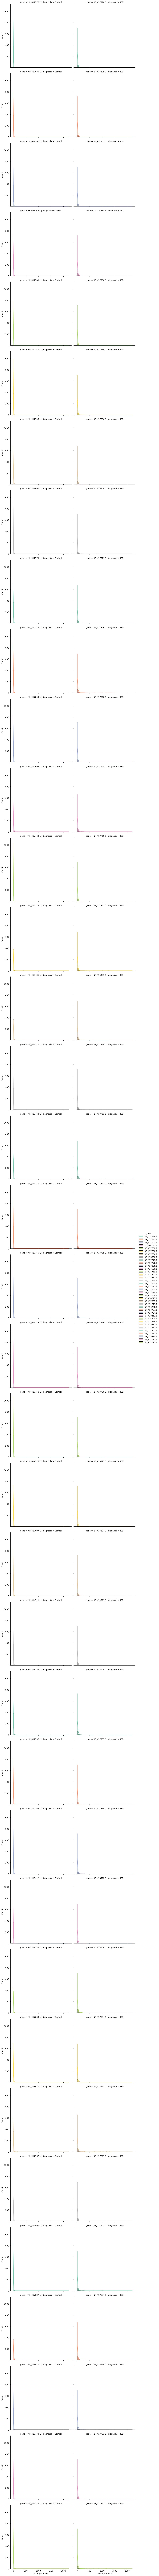

In [44]:
sns.displot(
    data=df_simple, #df_simple_filter, df_simple_filter_outlierless
    x="average_depth",
    hue="gene",
    kind="hist",
    multiple="layer",
    bins=100,
    palette="Set2",
    col='diagnosis',
    row='gene',
    kde=True
)

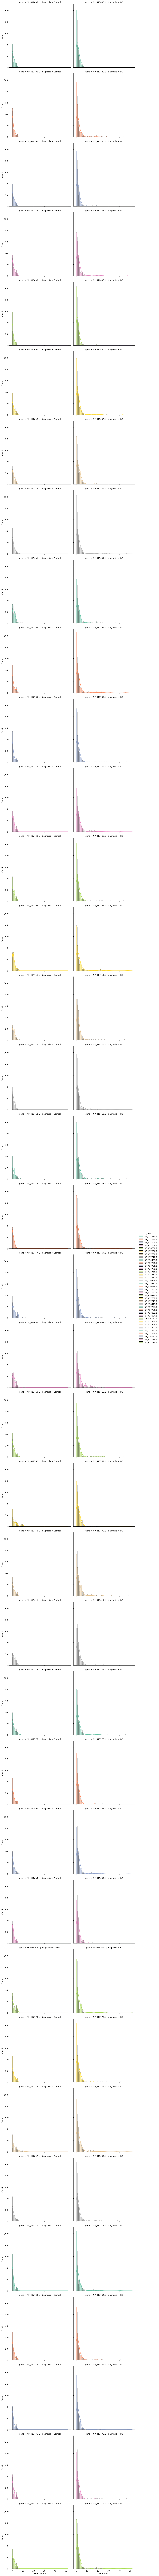

In [45]:
sns.displot(
    data=df_simple_filter, #df_simple_filter, df_simple_filter_outlierless
    x="norm_depth",
    hue="gene",
    kind="hist",
    multiple="layer",
    bins=100,
    palette="Set2",
    col='diagnosis',
    row='gene',
    kde=True
)

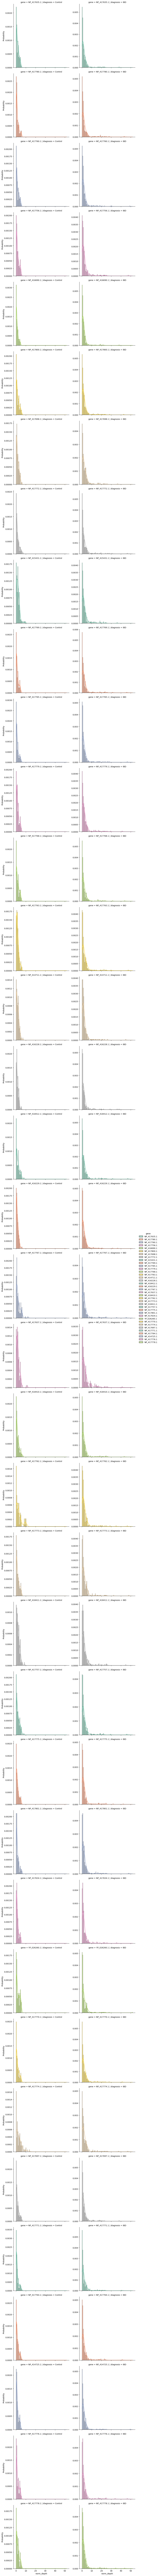

In [46]:
g = sns.displot(
    data=df_simple_filter,
    x="norm_depth",
    hue="gene",
    kind="hist",
    multiple="layer",
    bins=100,
    palette="Set2",
    row='gene',
    col='diagnosis',
    kde=True,
    facet_kws={'sharey': False, 'sharex': True},
    stat="probability"  # "density", "probability"
)

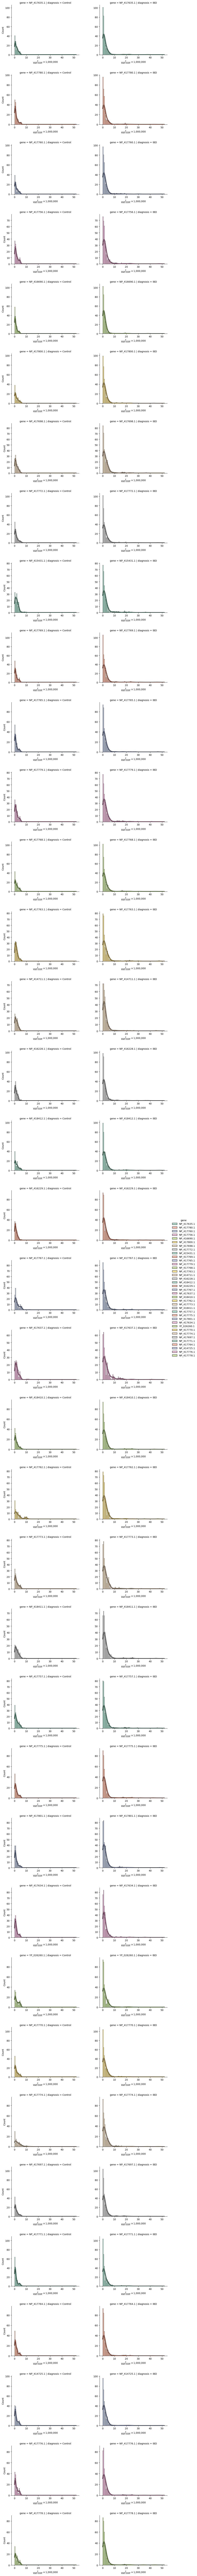

In [47]:
# For the genes found in any sample, there is a greater amount of the same coverage of target genes
# in IBD samples compared to control even after removing the 'extremely' deep coverage only seen in the IBD samples.
g = sns.displot(
    data=df_simple_filter,
    x="norm_depth",
    hue="gene",
    kind="hist",
    multiple="layer",
    bins=100,
    palette="Set2",
    row='gene',
    col='diagnosis',
    kde=True,
    facet_kws={'sharey': False, 'sharex': False}
)


# Get FacetGrid row names
row_names = g.row_names

# Loop through each row and align y-limits
for row_idx, row_name in enumerate(row_names):
    # Get all axes in this row
    axes_row = g.axes[row_idx, :]
    
    # Find max y-limit in this row
    max_ylim = max(ax.get_ylim()[1] for ax in axes_row)
    
    # Set uniform y-limit across this row
    for ax in axes_row:
        ax.set_ylim(top=max_ylim)

latex_xlabel = r'$\frac{\bar{x}}{\mathrm{read\ count}} \times 1{,}000{,}000$'

for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
    ax.set_xlabel(latex_xlabel)

# Iterate over each Axes in the FacetGrid to customize KDE lines and bar edges
for ax in g.axes.flatten():
    lines = [line for line in ax.lines if line.get_linestyle() == '-']
    
    # For each existing KDE line, add a black thicker line underneath it
    for line in lines:
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        
        # Plot black thicker line underneath
        ax.plot(
            xdata, ydata,
            color='black',
            linewidth=line.get_linewidth() + 2,  # thicker than original
            solid_capstyle='round',
            zorder=line.get_zorder() - 1  # behind original colored line
        )

    for patch in ax.patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(0.5)

g.fig.subplots_adjust(hspace=0.4, wspace=0.3, bottom=0.20)  # add space for x axis

plt.savefig('norm_coverage_distribution.png', dpi=262.5, bbox_inches='tight')
plt.show()


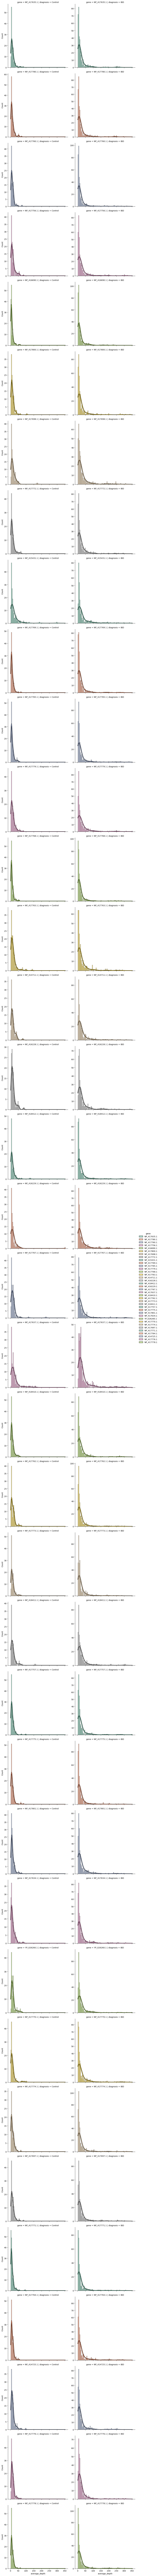

In [48]:
# For the genes found in any sample, there is a greater amount of the same coverage of target genes
# in IBD samples compared to control even after removing the 'extremely' deep coverage only seen in the IBD samples.
g = sns.displot(
    data=df_simple_filter_outlierless,
    x="average_depth",
    hue="gene",
    kind="hist",
    multiple="layer",
    bins=100,
    palette="Set2",
    col='diagnosis',
    row='gene',
    kde=True,
    facet_kws={'sharey': False}
)

# Iterate over each Axes in the FacetGrid to customize KDE lines and bar edges
for ax in g.axes.flatten():
    lines = [line for line in ax.lines if line.get_linestyle() == '-']
    
    # For each existing KDE line, add a black thicker line underneath it
    for line in lines:
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        
        # Plot black thicker line underneath
        ax.plot(
            xdata, ydata,
            color='black',
            linewidth=line.get_linewidth() + 2,  # thicker than original
            solid_capstyle='round',
            zorder=line.get_zorder() - 1  # behind original colored line
        )

    for patch in ax.patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(0.5)
plt.show()

In [76]:
run_counts = df_simple.groupby(['diagnosis', 'gene'])['run'].nunique().reset_index(name='unique_run_count')

df_plot = df_simple_filter.merge(run_counts, on=['diagnosis', 'gene'], how='left')

#If a group has fewer unique runs, each sample gets a larger weight.
#If a group has more unique runs, each sample gets a smaller weight.
df_plot['weight'] = 1 / df_plot['unique_run_count']
df_plot

contig         run         gene diagnosis  read_count  length  \
0        k119_3900_3  SRR2145375  NP_417635.1   Control    13713609   930.0   
1       k119_67485_2  SRR6468634  NP_417780.1       IBD    16121658   312.0   
2       k119_35424_7  SRR1765389  NP_417760.1   Control     3417267   360.0   
3       k119_2625_25  SRR2145467  NP_417756.1       IBD    12269020   390.0   
4      k119_31186_19  SRR1757110  NP_416690.1   Control     3926417   285.0   
...              ...         ...          ...       ...         ...     ...   
18495  k119_31059_14  SRR2145347  NP_417775.1       IBD    38513604   279.0   
18496  k119_24954_24  SRR2145355  NP_418410.1       IBD    19351034   429.0   
18497    k119_9064_2  SRR2145355  NP_418410.1       IBD    19351034   417.0   
18498  k119_51520_58  SRR2145449  NP_417763.1       IBD    21021189   369.0   
18499   k119_1867_13  SRR1765639  NP_417698.1       IBD     3429319   429.0   

       mapped  unmapped  net_mapped  length_right  average_depth  norm_depth  \
0        74.0      18.0        56.0         930.0           7.64    0.599044   
1        34.0      10.0        24.0         312.0           8.99    1.787292   
2        19.0       5.0        14.0         360.0           5.05    4.104970   
3       603.0     141.0       462.0         390.0         129.24   27.009868   
4        58.0      14.0        44.0         285.0          18.25   16.308784   
...       ...       ...         ...           ...            ...         ...   
18495    64.0      32.0        32.0         279.0          20.08    1.868725   
18496   234.0      58.0       176.0         429.0          50.12    6.037395   
18497    19.0       3.0        16.0         417.0           4.24    0.525443   
18498    89.0      27.0        62.0         369.0          20.05    2.584823   
18499    56.0      10.0        46.0         429.0          11.85    8.054771   

       unique_run_count    weight  
0                   372  0.002688  
1                   688  0.001453  
2                   372  0.002688  
3                   688  0.001453  
4                   372  0.002688  
...                 ...       ...  
18495               688  0.001453  
18496               688  0.001453  
18497               688  0.001453  
18498               688  0.001453  
18499               688  0.001453  

[18500 rows x 14 columns]

In [77]:
mean_depth = df_plot.groupby(['gene', 'diagnosis'])['norm_depth'].mean().reset_index(name='mean_norm_depth')
print(mean_depth)

df_plot.groupby(['gene', 'diagnosis'])['norm_depth'].count()

grouped = df_plot.groupby(['gene', 'diagnosis'])
grouped

           gene diagnosis  mean_norm_depth
0   NP_414711.1   Control         2.550671
1   NP_414711.1       IBD         3.488275
2   NP_414725.1   Control         2.613264
3   NP_414725.1       IBD         3.811131
4   NP_415431.1   Control         1.436985
..          ...       ...              ...
69  NP_418411.1       IBD         3.963840
70  NP_418412.1   Control         3.811622
71  NP_418412.1       IBD         5.331603
72  YP_026260.1   Control         2.406955
73  YP_026260.1       IBD         2.675965

[74 rows x 3 columns]


In [78]:
counts = grouped['norm_depth'].count()
print(counts)
weights = grouped['weight'].first()  # or .mean(), if all weights are equal per group
print(weights)
adjusted_counts = counts * weights
mean_count = adjusted_counts.reset_index(name='mean_count')
mean_count
print(mean_count)

means = mean_depth.merge(mean_count, on=['diagnosis', 'gene'], how='left')
means

gene         diagnosis
NP_414711.1  Control      124
             IBD          376
NP_414725.1  Control      148
             IBD          352
NP_415431.1  Control      170
                         ... 
NP_418411.1  IBD          376
NP_418412.1  Control      127
             IBD          373
YP_026260.1  Control      145
             IBD          355
Name: norm_depth, Length: 74, dtype: int64
gene         diagnosis
NP_414711.1  Control      0.002688
             IBD          0.001453
NP_414725.1  Control      0.002688
             IBD          0.001453
NP_415431.1  Control      0.002688
                            ...   
NP_418411.1  IBD          0.001453
NP_418412.1  Control      0.002688
             IBD          0.001453
YP_026260.1  Control      0.002688
             IBD          0.001453
Name: weight, Length: 74, dtype: float64
           gene diagnosis  mean_count
0   NP_414711.1   Control    0.333333
1   NP_414711.1       IBD    0.546512
2   NP_414725.1   Control    0.397849
3  

gene diagnosis  mean_norm_depth  mean_count
0   NP_414711.1   Control         2.550671    0.333333
1   NP_414711.1       IBD         3.488275    0.546512
2   NP_414725.1   Control         2.613264    0.397849
3   NP_414725.1       IBD         3.811131    0.511628
4   NP_415431.1   Control         1.436985    0.456989
..          ...       ...              ...         ...
69  NP_418411.1       IBD         3.963840    0.546512
70  NP_418412.1   Control         3.811622    0.341398
71  NP_418412.1       IBD         5.331603    0.542151
72  YP_026260.1   Control         2.406955    0.389785
73  YP_026260.1       IBD         2.675965    0.515988

[74 rows x 4 columns]

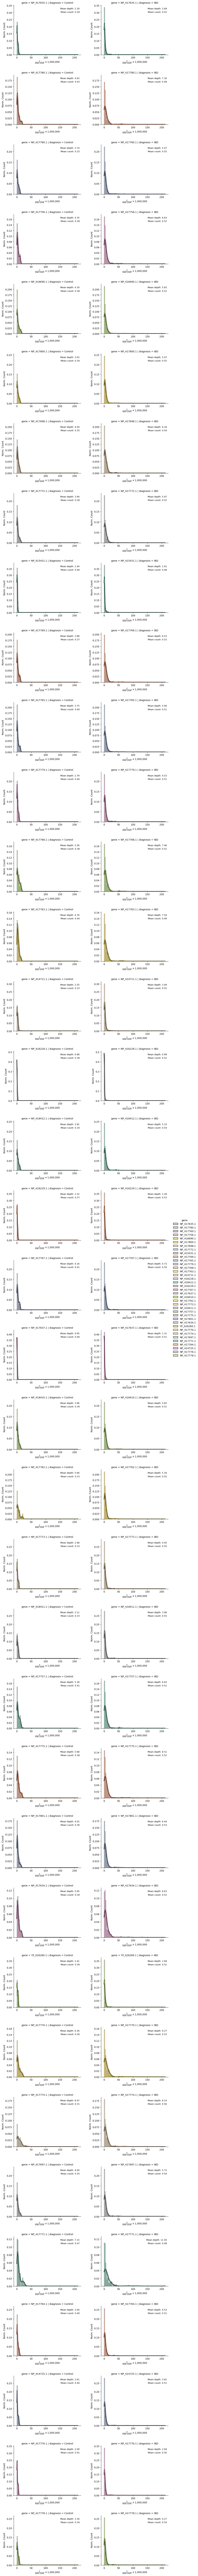

In [79]:
p = sns.displot(
    data=df_plot,
    x="norm_depth",
    hue="gene",
    kind="hist",
    multiple="layer",
    bins=100,
    palette="Set2",
    col='diagnosis',
    row='gene',
    kde=True,
    weights="weight",  # normalize using weights
    facet_kws={'sharey': False, 'sharex': False} # sharex must be false to label the x axis!
)

latex_xlabel = r'$\frac{\bar{x}}{\mathrm{read\ count}} \times 1{,}000{,}000$'
row_names = p.row_names

# Loop through each row and align y-limits
for row_idx, row_name in enumerate(row_names):
    # Get all axes in this row
    axes_row = p.axes[row_idx, :]
    
    # Find max y-limit in this row
    max_ylim = max(ax.get_ylim()[1] for ax in axes_row)
    
    # Set uniform y-limit across this row
    for ax in axes_row:
        ax.set_ylim(top=max_ylim)
        ax.set_ylabel("Norm. Count")

for ax in p.axes.flatten():
# Iterate over each Axes in the FacetGrid to customize KDE lines and bar edges
#for ax in p.axes.flatten():
    lines = [line for line in ax.lines if line.get_linestyle() == '-']
    
    # For each existing KDE line, add a black thicker line underneath it
    for line in lines:
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        
        # Plot black thicker line underneath
        ax.plot(
            xdata, ydata,
            color='black',
            linewidth=line.get_linewidth() + 2,  # thicker than original
            solid_capstyle='round',
            zorder=line.get_zorder() - 1  # behind original colored line
        )

    for patch in ax.patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(0.5)

#for ax in p.axes.flatten():
    # Get gene and diagnosis from facet title
    title = ax.get_title()
    try:
        gene = title.split('|')[0].split('=')[1].strip()
        diagnosis = title.split('|')[1].split('=')[1].strip()
    except IndexError:
        continue  # skip if title parsing fails
    
    # Get the mean value for this facet
    row = means[(means['gene'] == gene) & (means['diagnosis'] == diagnosis)]
    if not row.empty:
        mean_dep = row['mean_norm_depth'].values[0]
        mean_con = row['mean_count'].values[0]
        ax.text(
            0.98, 0.95,
            f"Mean depth: {mean_dep:.2f}",
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
        )
        ax.text(
            0.98, 0.88,
            f"Mean count: {mean_con:.2f}",
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
        )

    ax.tick_params(labelbottom=True)
    ax.set_xlabel(latex_xlabel)

p.fig.subplots_adjust(hspace=0.4, wspace=0.3, bottom=0.20)  # add space for x axis

plt.savefig('norm_coverage_count_distribution.png', dpi=100, bbox_inches='tight')
plt.show()

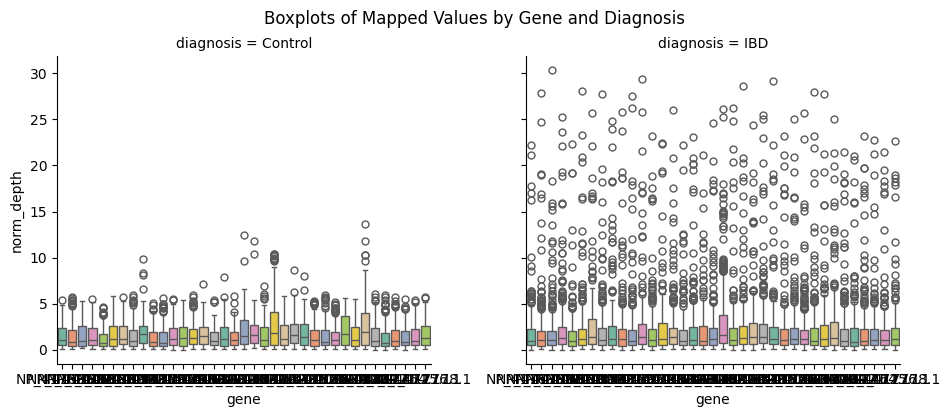

In [81]:
# While the distribution seems to show an increase in genes 
sns.catplot(
    data=df_simple_filter_outlierless,
    x="gene",
    y="norm_depth",  # or "mapped"
    hue="gene", 
    kind="box",
    col="diagnosis",
    palette="Set2",
    height=4,
    aspect=1.2
)

plt.suptitle("Boxplots of Mapped Values by Gene and Diagnosis", y=1.03)
plt.show()

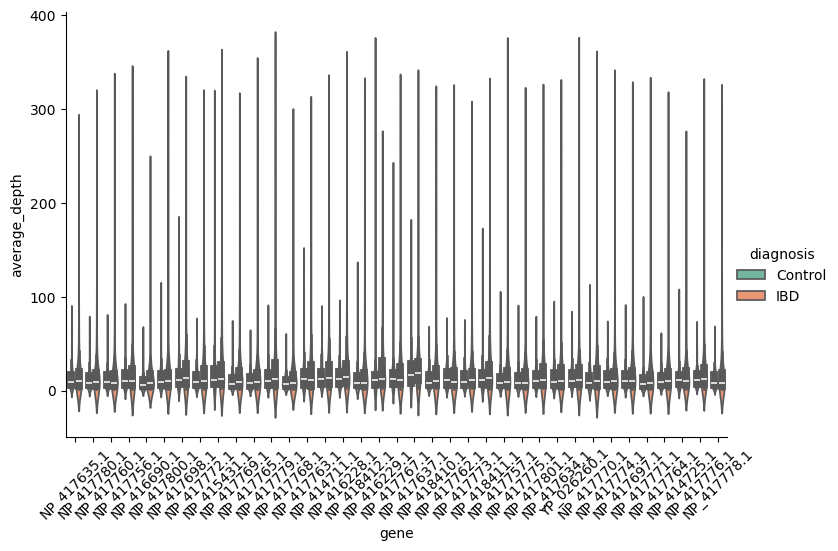

In [54]:
sns.catplot(
    data=df_simple_filter_outlierless,
    x="gene",
    y="average_depth",
    hue="diagnosis",
    kind="violin",
    palette="Set2",
    aspect=1.5
)
plt.xticks(rotation=45)

#plt.savefig('coverage_violin.png', dpi=300, bbox_inches='tight')
plt.show()

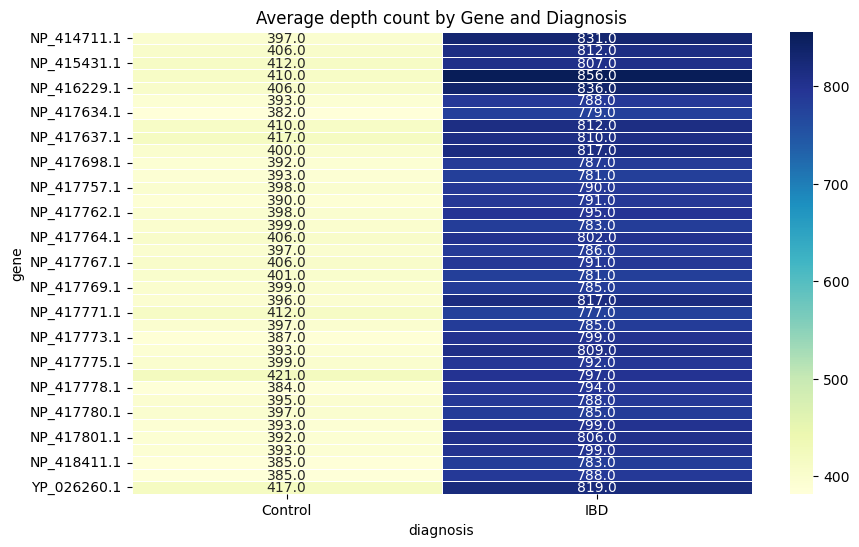

In [83]:
heatmap_data = df_simple.pivot_table(
    index='gene',
    columns='diagnosis',
    values='norm_depth',    # 'average_depth', or 'mapped'
    aggfunc='count'      # 'count', or 'mean'
)


plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".1f", linewidths=.5)
plt.title('Average depth count by Gene and Diagnosis')

#plt.savefig('coverage_mean.png', dpi=300, bbox_inches='tight')
plt.show()

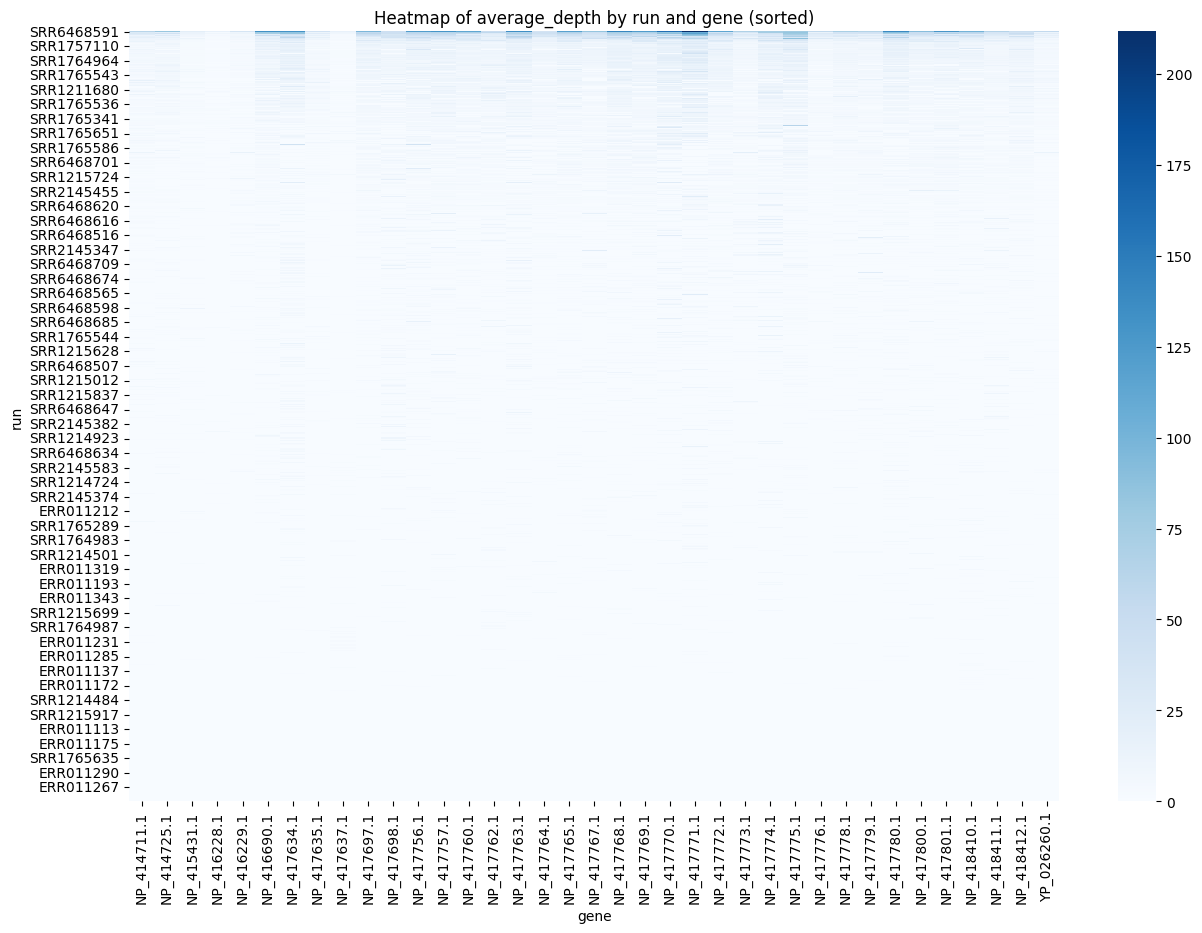

In [84]:
hd = df_simple.pivot_table(index="run", columns="gene", values="norm_depth")

hd_filled = hd.fillna(hd.mean().mean())

# Sort by row means to get some order
hd_sorted = hd_filled.loc[hd_filled.mean(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(15,10))
sns.heatmap(hd_sorted, cmap='Blues')
plt.title("Heatmap of average_depth by run and gene (sorted)")
plt.show()

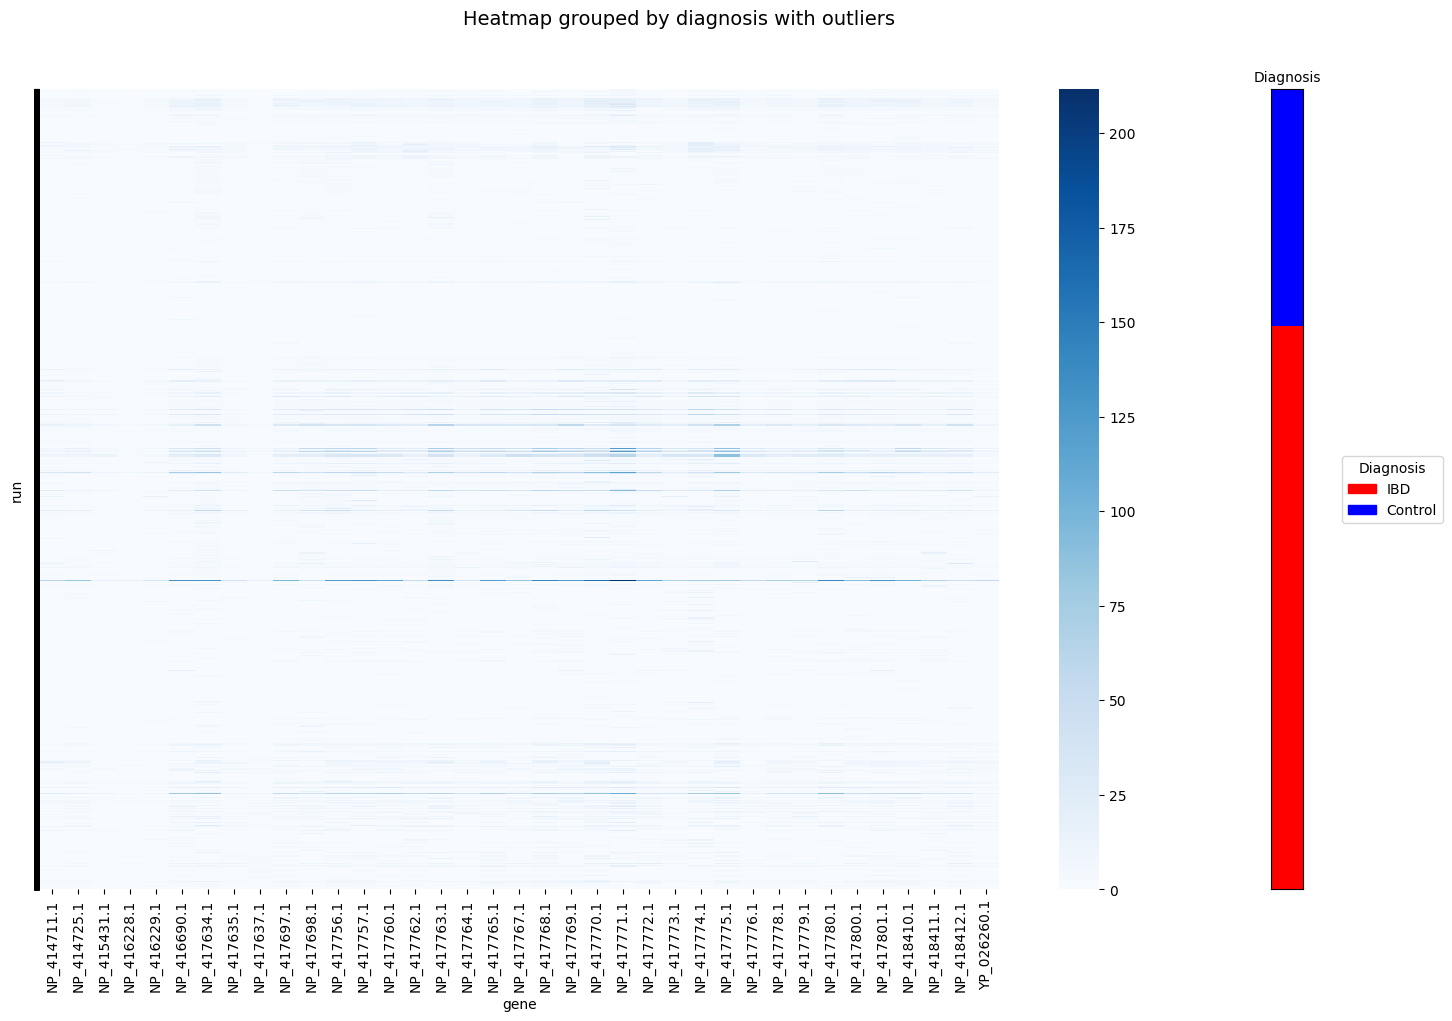

In [85]:
###### filter with the `filtered_df` dataframe or full heatmap with df_simple
hd = df_simple.pivot_table(index="run", columns="gene", values="norm_depth") #filtered_df, df_simple?
hd_filled = hd.fillna(hd.mean().mean())
######

# Diagnosis lookup
run_to_diag = df_simple.set_index('run')['diagnosis']
diag_for_runs = run_to_diag.loc[hd_filled.index]

# Sort by diagnosis first, then by row mean within each group
sorted_runs = diag_for_runs.sort_values().index
hd_sorted = hd_filled.loc[sorted_runs]
diagnosis_sorted = diag_for_runs.loc[sorted_runs]

# Create a palette and color array
palette = {'IBD': 'red', 'Control': 'blue'}
diagnosis_colors = diagnosis_sorted.map(palette)
rgb_colors = [mcolors.to_rgb(c) for c in diagnosis_colors]

# === Plot heatmap + side diagnosis color bar ===
fig = plt.figure(figsize=(16, 10))

# Heatmap axis
ax1 = fig.add_axes([0.1, 0.1, 0.75, 0.8])
sns.heatmap(hd_sorted, cmap='Blues', ax=ax1, cbar=True)
ax1.set_yticks(np.arange(len(hd_sorted)) + 0.5)
ax1.set_yticklabels([])

# Color bar axis for diagnosis strip
ax2 = fig.add_axes([0.87, 0.1, 0.02, 0.8])
color_matrix = np.array(rgb_colors).reshape(-1, 1, 3)
ax2.imshow(color_matrix, aspect='auto')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Diagnosis", fontsize=10)

# Add legend manually
handles = [mpatches.Patch(color=c, label=l) for l, c in palette.items()]
fig.legend(handles=handles, title="Diagnosis", loc="center left", bbox_to_anchor=(0.91, 0.5))

plt.suptitle("Heatmap grouped by diagnosis with outliers", fontsize=14)

plt.savefig('coverage_heatmap_outliers.png', dpi=300, bbox_inches='tight')

plt.show()

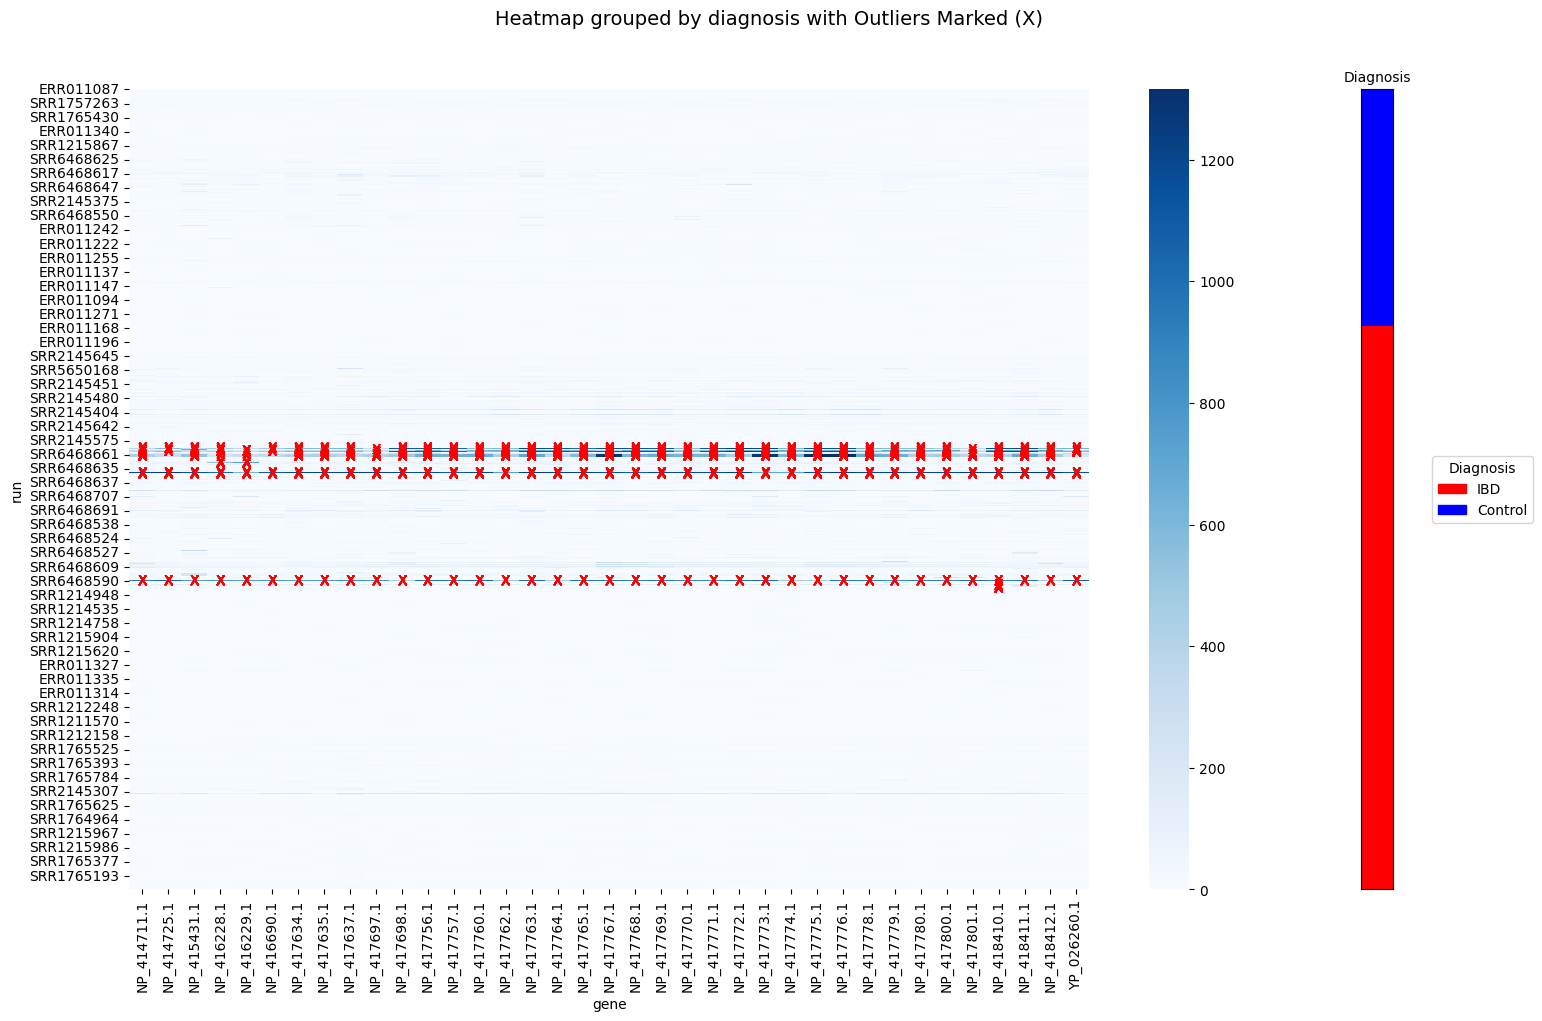

In [58]:
outlier_mask = (hd_sorted < lower_bound) | (hd_sorted > upper_bound)

diagnosis_colors = diagnosis_sorted.map(palette)
rgb_colors = [mcolors.to_rgb(c) for c in diagnosis_colors]

fig = plt.figure(figsize=(16, 10))

ax = fig.add_axes([0.1, 0.1, 0.75, 0.8])
sns.heatmap(hd_sorted, cmap='Blues', ax=ax, cbar=True)

for y in range(hd_sorted.shape[0]):
    for x in range(hd_sorted.shape[1]):
        if outlier_mask.iloc[y, x]:
            ax.text(x + 0.5, y + 0.5, 'X', ha='center', va='center', color='red', fontsize=10)

ax2 = fig.add_axes([0.87, 0.1, 0.02, 0.8])
color_matrix = np.array(rgb_colors).reshape(-1, 1, 3)
ax2.imshow(color_matrix, aspect='auto')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Diagnosis", fontsize=10)

handles = [mpatches.Patch(color=c, label=l) for l, c in palette.items()]
fig.legend(handles=handles, title="Diagnosis", loc="center left", bbox_to_anchor=(0.91, 0.5))

plt.suptitle("Heatmap grouped by diagnosis with Outliers Marked (X)", fontsize=14)

#plt.savefig('coverage_heatmap_full_marked_outliers.png', dpi=300, bbox_inches='tight')
plt.show()

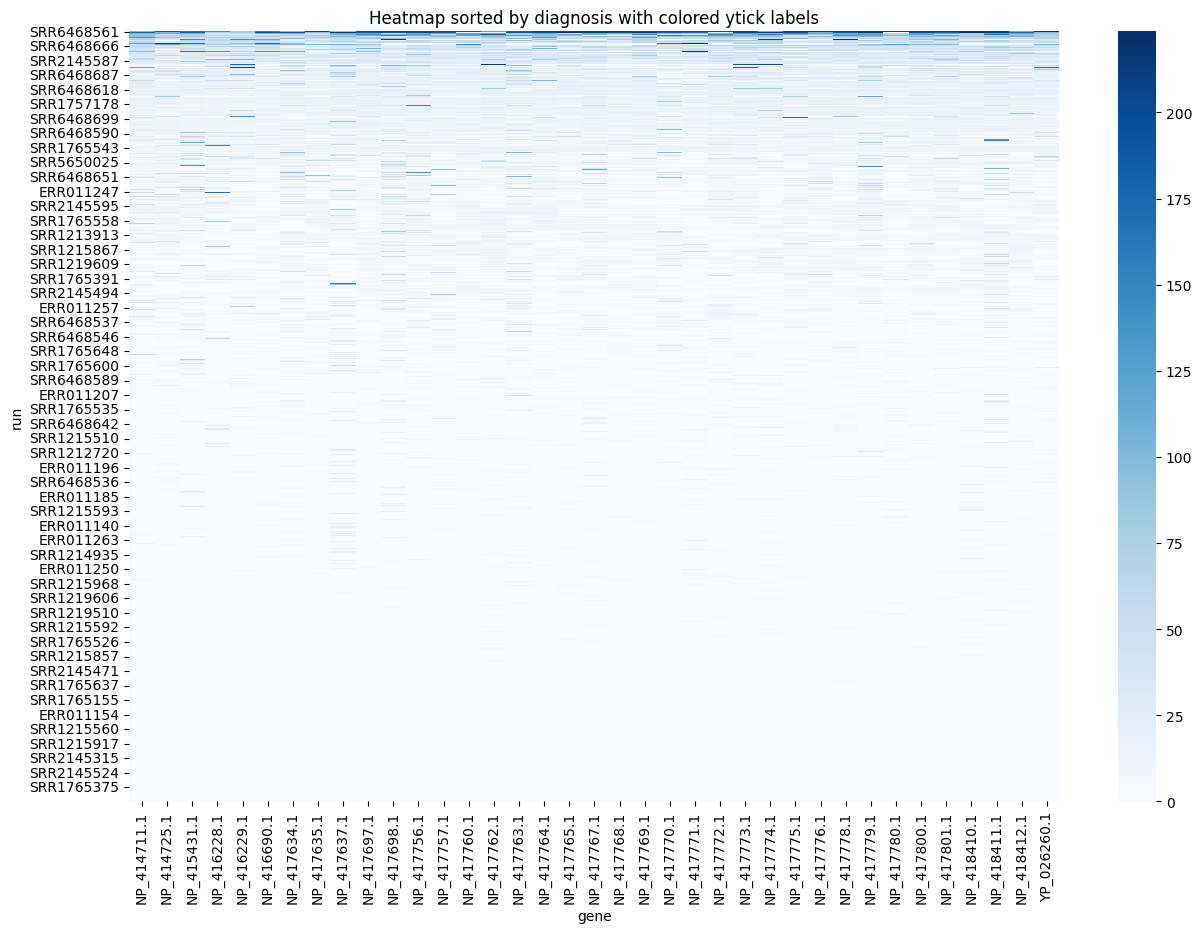

In [59]:
# Calculate mean and std deviation
mean_val = df_simple['average_depth'].mean()
std_val = df_simple['average_depth'].std()

# Define lower and upper bounds
lower_bound = mean_val - 3 * std_val
upper_bound = mean_val + 3 * std_val

# Filter rows where average_depth is within ±3 SD
filtered_df = df_simple[(df_simple['average_depth'] >= lower_bound) & (df_simple['average_depth'] <= upper_bound)]

hd = filtered_df.pivot_table(index="run", columns="gene", values="average_depth")

hd_filled = hd.fillna(hd.mean().mean())

# Sort by row means to get some order
hd_filtered_sorted = hd_filled.loc[hd_filled.mean(axis=1).sort_values(ascending=False).index]

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(hd_filtered_sorted, cmap='Blues', ax=ax, cbar=True)

plt.title("Heatmap sorted by diagnosis with colored ytick labels")
plt.show()

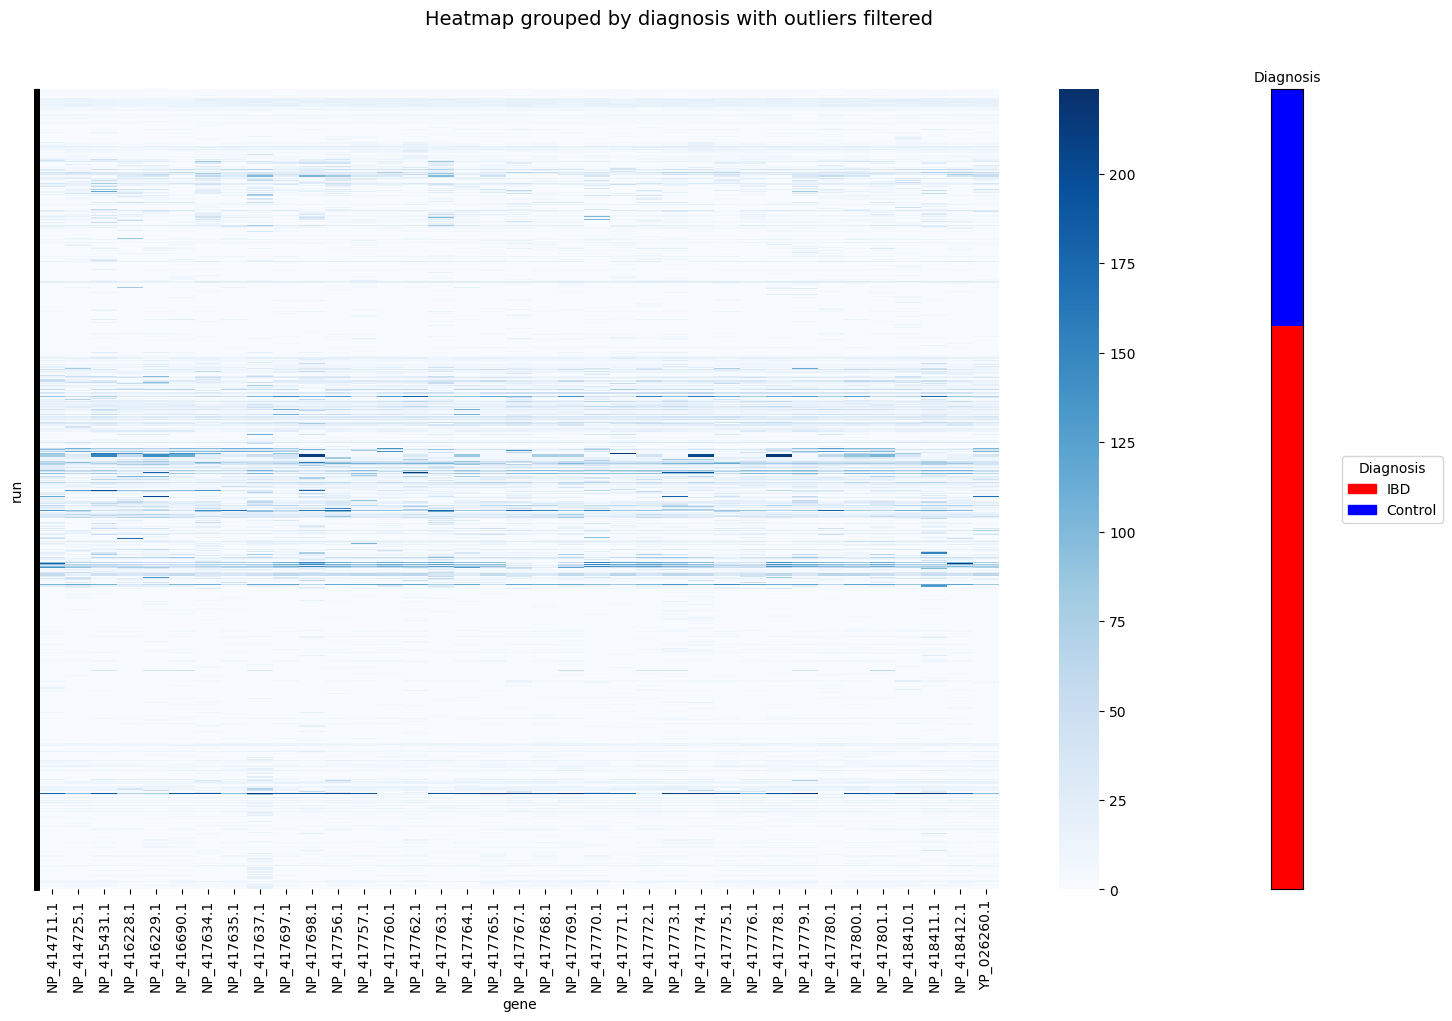

In [60]:

###### filter with the `filtered_df` dataframe or full heatmap with df_simple
hd = filtered_df.pivot_table(index="run", columns="gene", values="average_depth") #filtered_df, df_simple?
hd_filled = hd.fillna(hd.mean().mean())
######

# Diagnosis lookup
run_to_diag = df_simple.set_index('run')['diagnosis']
diag_for_runs = run_to_diag.loc[hd_filled.index]

# Sort by diagnosis first, then by row mean within each group
sorted_runs = diag_for_runs.sort_values().index
hd_sorted = hd_filled.loc[sorted_runs]
diagnosis_sorted = diag_for_runs.loc[sorted_runs]

# Create a palette and color array
palette = {'IBD': 'red', 'Control': 'blue'}
diagnosis_colors = diagnosis_sorted.map(palette)
rgb_colors = [mcolors.to_rgb(c) for c in diagnosis_colors]

# === Plot heatmap + side diagnosis color bar ===
fig = plt.figure(figsize=(16, 10))

# Heatmap axis
ax1 = fig.add_axes([0.1, 0.1, 0.75, 0.8])
sns.heatmap(hd_sorted, cmap='Blues', ax=ax1, cbar=True)
ax1.set_yticks(np.arange(len(hd_sorted)) + 0.5)
ax1.set_yticklabels([])

# Color bar axis for diagnosis strip
ax2 = fig.add_axes([0.87, 0.1, 0.02, 0.8])
color_matrix = np.array(rgb_colors).reshape(-1, 1, 3)
ax2.imshow(color_matrix, aspect='auto')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Diagnosis", fontsize=10)

# Add legend manually
handles = [mpatches.Patch(color=c, label=l) for l, c in palette.items()]
fig.legend(handles=handles, title="Diagnosis", loc="center left", bbox_to_anchor=(0.91, 0.5))

plt.suptitle("Heatmap grouped by diagnosis with outliers filtered", fontsize=14)

plt.savefig('coverage_heatmap_filtered_outliers.png', dpi=300, bbox_inches='tight')

plt.show()

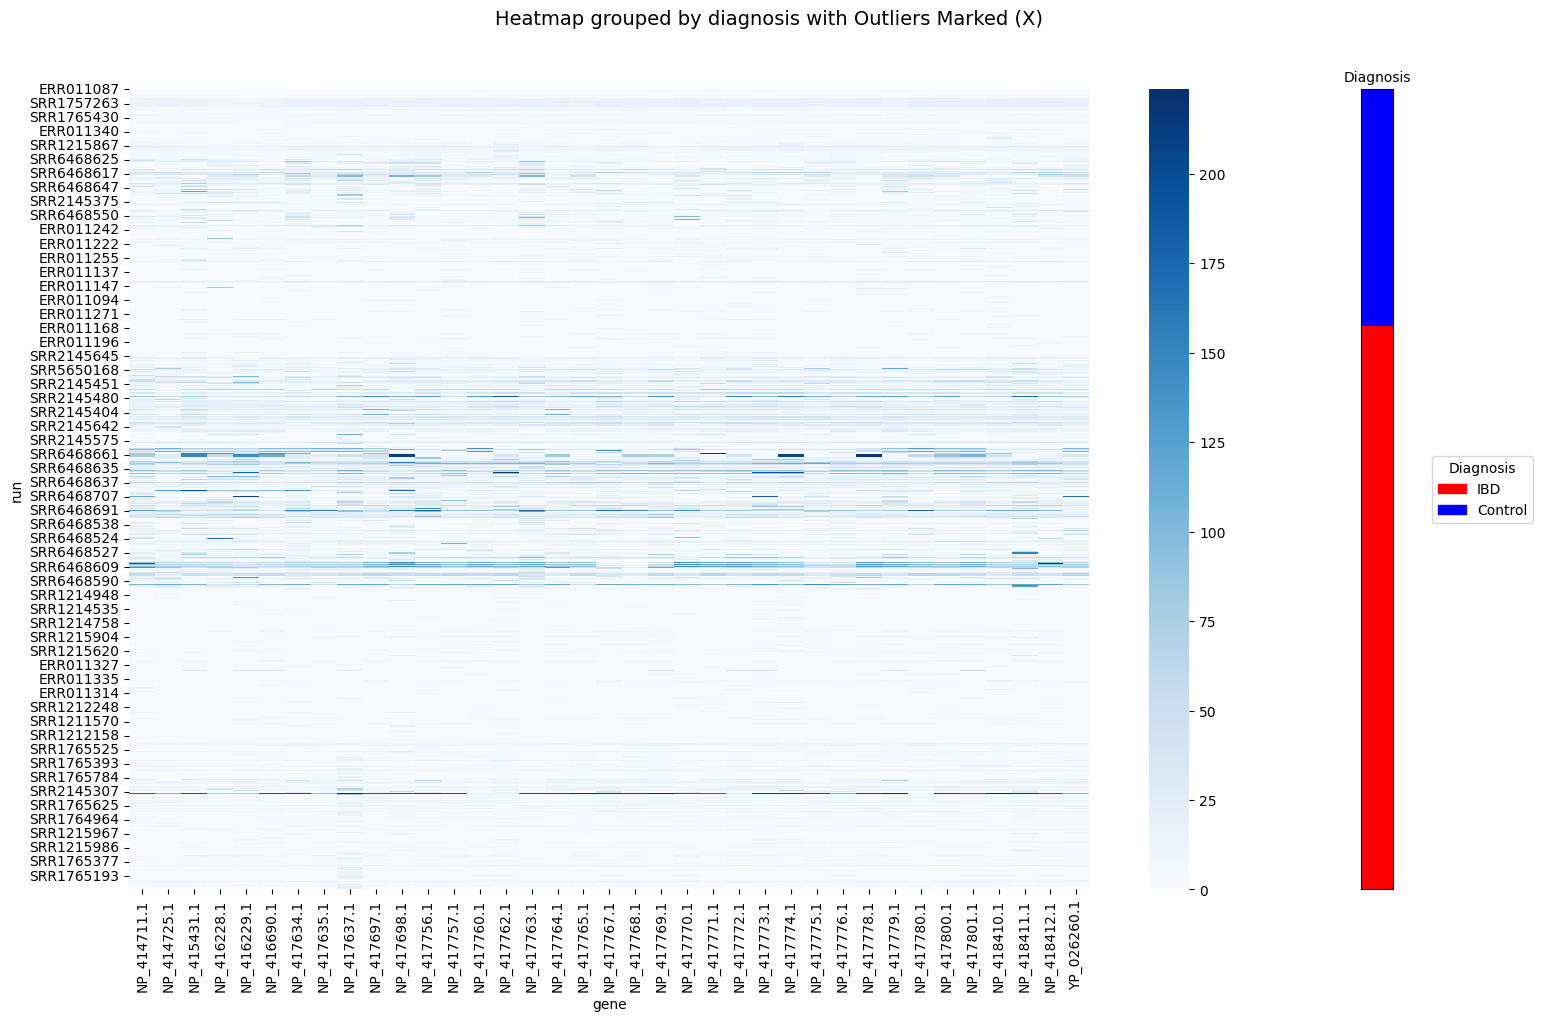

In [61]:
outlier_mask = (hd_sorted < lower_bound) | (hd_sorted > upper_bound)

diagnosis_colors = diagnosis_sorted.map(palette)
rgb_colors = [mcolors.to_rgb(c) for c in diagnosis_colors]

fig = plt.figure(figsize=(16, 10))

ax = fig.add_axes([0.1, 0.1, 0.75, 0.8])
sns.heatmap(hd_sorted, cmap='Blues', ax=ax, cbar=True)

for y in range(hd_sorted.shape[0]):
    for x in range(hd_sorted.shape[1]):
        if outlier_mask.iloc[y, x]:
            ax.text(x + 0.5, y + 0.5, 'X', ha='center', va='center', color='red', fontsize=10)

ax2 = fig.add_axes([0.87, 0.1, 0.02, 0.8])
color_matrix = np.array(rgb_colors).reshape(-1, 1, 3)
ax2.imshow(color_matrix, aspect='auto')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Diagnosis", fontsize=10)

handles = [mpatches.Patch(color=c, label=l) for l, c in palette.items()]
fig.legend(handles=handles, title="Diagnosis", loc="center left", bbox_to_anchor=(0.91, 0.5))

plt.suptitle("Heatmap grouped by diagnosis with Outliers Marked (X)", fontsize=14)

#plt.savefig('coverage_heatmap_full_marked_outliers.png', dpi=300, bbox_inches='tight')
plt.show()